In [ ]:
!python --version

Python 3.10.12



# Reto IA: Detección de contenido sensible en tuits de Twitter

El trolling es un término del argot de internet que se refiere a una persona que intencionalmente inicia discusiones o molesta a otros publicando comentarios provocadores. El único propósito del trolling es enfadar a las personas. Se ha comparado con el flaming en el contexto del ciberacoso. Además, muchos trolls consideran que lo que hacen es un “arte”. Frecuentemente se esconden detrás del anonimato. El símbolo del trolling es un dibujo en blanco y negro de una cara con una sonrisa traviesa, que simboliza la expresión que alguien hace mientras molesta a sus víctimas.

Propósito del trolling:
- Ser una fuente de entretenimiento para el troll.
- Ser ofensivo y argumentativo.
- Obtener placer al molestar intensamente a los demás.
- Buscar “presas” en internet (también conocido como tú).
- Llamar la atención.
- Sentirse poderoso.
- Ganar reconocimiento.
- Hacer enojar a la víctima.


#### Importaciones

In [ ]:
!pip install keras
!pip install keras-preprocessing
!pip install tensorflow

In [ ]:
import sys
import os
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import itertools
from sklearn.metrics import confusion_matrix
from __future__ import division

In [ ]:
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
import pandas as pd

data = pd.read_json('../Datos/Dataset for Detection of Cyber-Trolls.json',lines = True)
data.head(15)

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN
5,Ill save you the trouble sister. Here comes a ...,"{'notes': '', 'label': ['1']}",NaN
6,Im dead serious.Real athletes never cheat don...,"{'notes': '', 'label': ['1']}",NaN
7,...go absolutely insane.hate to be the bearer ...,"{'notes': '', 'label': ['1']}",NaN
8,Lmao im watching the same thing ahaha. The ga...,"{'notes': '', 'label': ['1']}",NaN
9,LOL no he said What do you call a jail cell ...,"{'notes': '', 'label': ['1']}",NaN


In [ ]:
from keras.layers import Dense,LSTM,Dropout,GRU,SimpleRNN,Embedding
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
!pip install nltk
nltk.download('stopwords')
nltk.download('punkt')

#### Dataset
El Dataset es se conforma por un conjunto de Twits 20001. Cada twits ya posee una etiqueta que asigna una de las dos categorías.
#### Métrica de evaluación
 - Se hará uso de las redes neurales recurrentes (RNN) para clasificar cada twit según la clase a la que corresponda.

#### Estrategia de resolución
1. Se debe realizar el siguiente pre-procesado del texto de los Twits. Este está compuesto por:
    - Limpieza
    - Tokenizer
    - Pad_sequences (Acá es necesario analizar la base de datos para seleccionar un número óptimo de secuencias)


2. Se deben evaluar diferentes arquitecturas de red para evaluar la precisión del modelo para la clasificación. Estas arquitecturas inicialmente están compuestas por las capas: Secuantial(),Embedding(), LSTM(), Dropout(), Dense(). Los parámetros a evaluar son la dimensión de la capa Embedding() para los valores [32,64,128] y las de la capa LSTM() para los valores [64,128,196]. La función de pérdida será una suma cuadrática. Al final se obtendrá un vector de probabilidades, por lo que se puede asignar la categoría en función de la probabilidad.
    
3. Evaluar algunas variaciones en el modelo (Opcional)
    - Se cambiará la función de activación de la capa Dense por una Relu
    - Se definirá una tasa de aprendizaje de 1e-5 y un decaimiento de 1e-5
    - La capa Embedding tendrà una capa de salida 128 elementos
    - La capa LSTM tendrá como dimensión del espacio de salida un valor de 196
    - La función de perdida será una crosentropía binária
    - El modelo tendrá en cuenta el desbalance que hay en la cantidad de datos que hay en las cateogrías.
    - El número de epocas será aumentado a 25

In [ ]:
data

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN
...,...,...,...
19996,I dont. But what is complaining about it goi...,"{'notes': '', 'label': ['0']}",NaN
19997,Bahah yeah i&;m totally just gonna&; get pis...,"{'notes': '', 'label': ['0']}",NaN
19998,hahahahaha >:) im evil mwahahahahahahahahaha,"{'notes': '', 'label': ['0']}",NaN
19999,What&;s something unique about Ohio? :),"{'notes': '', 'label': ['0']}",NaN


In [ ]:
#data.annotation.iloc[0].get('label')[0]
data['annotation'] = data['annotation'].apply(lambda x: int(x.get('label')[0]))

AttributeError: 'int' object has no attribute 'get'

In [ ]:
data = data[['content','annotation']]
data.head()

,content,annotation
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1


In [ ]:
import string
from nltk.tokenize import word_tokenize
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab')

def limpiar_texto(texto):
    # Descargar las stopwords si no están disponibles


    # Obtener la lista de stopwords en español
    stop_words = set(stopwords.words('english'))

    # Tokenizar el texto
    tokens = word_tokenize(texto.lower())

    # Eliminar stopwords y símbolos
    tokens_limpios = [token for token in tokens if token.lower() not in stop_words and token not in string.punctuation]

    # Unir los tokens limpios en un nuevo texto
    texto_limpio = ' '.join(tokens_limpios)

    return texto_limpio

data['content'] = data['content'].apply(limpiar_texto)
data.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
<ipython-input-48-1134783d9dd5>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content'] = data['content'].apply(limpiar_texto)


,content,annotation
0,Get fucking real dude,1
1,dirty come crook Rengel Dems fucking corrupt '...,1
2,fuck could day Let 's hour Ping later sched wr...,1
3,Dude dont finish enclosing fucking showers hat...,1
4,WTF talking Men men thats menage 's gay,1


In [ ]:
def tokenize_column(data, column_name):

    tokenizer = Tokenizer(num_words=5000, oov_token="")  # Create a Tokenizer instance
    tokenizer.fit_on_texts(data[column_name])  # Fit the tokenizer on the text data
    sequences = tokenizer.texts_to_sequences(data[column_name])  # Convert text to sequences of tokens
    return tokenizer, sequences

# Example usage:
# Assuming 'data' is your DataFrame and 'content' is the column with text:
tokenizer, sequences = tokenize_column(data, 'content')

# Access the tokenized sequences:
print(sequences)  # To see the tokenized sequences

# Access the word index:
word_index = tokenizer.word_index
print(word_index) # To see the word index

[[12, 14, 192, 77], [696, 105, 4746, 4747, 4748, 14, 3202, 4, 661, 45, 3776, 98, 9], [8, 50, 60, 107, 4, 432, 1978, 466, 4749, 736, 339], [77, 51, 1130, 4750, 14, 1806, 2, 313, 3777, 946, 326, 4751, 814, 143, 569], [254, 259, 697, 697, 88, 4752, 4, 24], [302, 608, 815, 553, 420, 84, 1378, 8, 1807, 1549, 273, 56, 91], [30, 294, 484, 192, 4753, 80, 3778, 6, 59, 1979, 1671, 8, 77, 288, 19], [32, 1181, 1028, 2, 4754, 64, 467, 10, 51, 1379, 2747, 169, 16, 609, 4755], [95, 30, 369, 58, 839, 24, 101, 737, 4756, 25, 60, 51, 36, 203, 623, 17], [10, 103, 106, 1808, 1380, 24, 101, 2748, 839], [985, 3203, 101, 5, 1672, 1980, 3779, 81, 23, 186, 4757, 4758, 4], [3780, 78], [14, 3204], [593, 8, 916], [3, 183, 413, 18], [102, 3, 13, 554], [384, 15, 4759, 95, 8, 146, 1550, 4760], [7], [210, 363, 1072, 314, 52, 408, 1981, 17], [2749, 1551, 199, 3, 25, 2749], [3, 1131, 1182, 1073, 3781, 4761, 1982, 39], [14, 388, 986, 6, 19, 594, 504, 1673, 166, 3782, 4762], [86, 38, 8, 785], [1300, 20, 610], [6, 12, 26,

In [ ]:
data_token = data.copy()
data_token['content'] = sequences
data_token.head()

,content,annotation
0,"[12, 14, 192, 77]",1
1,"[696, 105, 4746, 4747, 4748, 14, 3202, 4, 661,...",1
2,"[8, 50, 60, 107, 4, 432, 1978, 466, 4749, 736,...",1
3,"[77, 51, 1130, 4750, 14, 1806, 2, 313, 3777, 9...",1
4,"[254, 259, 697, 697, 88, 4752, 4, 24]",1


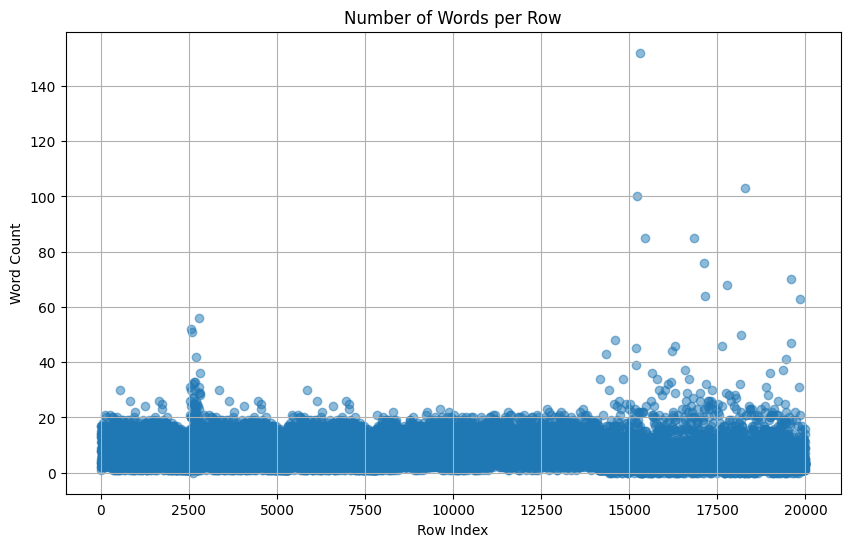

In [ ]:
import matplotlib.pyplot as plt

data['word_count'] = data['content'].apply(lambda text: len(text.split()))


plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(data.index, data['word_count'], marker='o', alpha=0.5)  # alpha for transparency
plt.xlabel('Row Index')
plt.ylabel('Word Count')
plt.title('Number of Words per Row')
plt.grid(True)
plt.show()

In [ ]:
# elegimnos el tamanio de los datos en 40
xpad = pad_sequences(data_token['content'], maxlen=40)
voc=xpad[0].size
print('el tamaño maximo de la seciencia es ' + str(voc))
print(xpad)

el tamaño maximo de la seciencia es 40
[[   0    0    0 ...   14  192   77]
 [   0    0    0 ... 3776   98    9]
 [   0    0    0 ... 4749  736  339]
 ...
 [   0    0    0 ...   30 1131    1]
 [   0    0    0 ...   82 4679 1257]
 [   0    0    0 ...  709    1   16]]


#### Modelo

In [63]:
def evaluate_rnn_architectures(X, y, embedding_dims, lstm_dims):
    results = {}
    for embedding_dim in embedding_dims:
        print('embedding_dim: ' + str(embedding_dim))
        for lstm_dim in lstm_dims:
            print('lstm_dim: ' + str(lstm_dim))
            # dividir datos en entrenamiento y testeo
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # construyendo el modelo
            model = Sequential()
            model.add(Embedding(5000, embedding_dim))  # tamanio del vocabulario
            model.add(LSTM(lstm_dim))
            model.add(Dropout(0.2))
            model.add(Dense(1, activation='sigmoid'))  # output con funcion de activacion

            # Compilacion
            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # usando error

            # entrenamiento
            model.fit(X_train, y_train, epochs=20, batch_size=40, validation_split=0.1)  # ajuste de capas y batch_size

            # validacion
            _, accuracy = model.evaluate(X_test, y_test, verbose=0)
            results[(embedding_dim, lstm_dim)] = accuracy

    return results


In [64]:
evaluate_rnn_architectures(xpad,data_token['annotation'],[32,64,128],[64,128,196])

embedding_dim: 32
lstm_dim: 64
Epoch 1/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.6501 - loss: 0.6160 - val_accuracy: 0.7631 - val_loss: 0.4877
Epoch 2/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8205 - loss: 0.3880 - val_accuracy: 0.8044 - val_loss: 0.4516
Epoch 3/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8664 - loss: 0.3219 - val_accuracy: 0.8069 - val_loss: 0.4479
Epoch 4/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.8958 - loss: 0.2597 - val_accuracy: 0.8288 - val_loss: 0.4206
Epoch 5/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9191 - loss: 0.2183 - val_accuracy: 0.8369 - val_loss: 0.4370
Epoch 6/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9322 - loss: 0.1804 - val_accuracy: 0.8562 - val_loss: 0.4337
Epoch 7/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9447 - loss: 0.1516 - val_accuracy: 0.8550 - val_loss: 0.4756
Epoch 8/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accur

{(32, 64): 0.8737815618515015,
 (32, 128): 0.8745313882827759,
 (32, 196): 0.8602849245071411,
 (64, 64): 0.8660334944725037,
 (64, 128): 0.873031735420227,
 (64, 196): 0.8782804012298584,
 (128, 64): 0.871532142162323,
 (128, 128): 0.8815296292304993,
 (128, 196): 0.8772806525230408}

In [66]:
 resultados_modelos = {(32, 64): 0.8737815618515015, (32, 128): 0.8745313882827759, (32, 196): 0.8602849245071411,(64, 64): 0.8660334944725037,(64, 128): 0.873031735420227,(64, 196): 0.8782804012298584,(128, 64): 0.871532142162323,(128, 128): 0.8815296292304993,(128, 196): 0.8772806525230408}
 print(resultados_modelos)

{(32, 64): 0.8737815618515015, (32, 128): 0.8745313882827759, (32, 196): 0.8602849245071411, (64, 64): 0.8660334944725037, (64, 128): 0.873031735420227, (64, 196): 0.8782804012298584, (128, 64): 0.871532142162323, (128, 128): 0.8815296292304993, (128, 196): 0.8772806525230408}


In [67]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam

initial_learning_rate = 1e-5
decay_steps = 10000
decay_rate = 1e-5

lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=False
)

optimizer = Adam(learning_rate=lr_schedule)

In [93]:
def evaluate_rnn_architectures(X, y, embedding_dims, lstm_dims):
    results = {}
    for embedding_dim in embedding_dims:
        print('embedding_dim: ' + str(embedding_dim))
        for lstm_dim in lstm_dims:
            print('lstm_dim: ' + str(lstm_dim))
            # dividir datos en entrenamiento y testeo
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # construyendo el modelo
            model = Sequential()
            model.add(Embedding(5000, embedding_dim))  # tamanio del vocabulario
            model.add(LSTM(units=lstm_dim,recurrent_dropout=0.2, dropout=0.2))
            model.add(Dropout(0.5))
            model.add(Dense(1, activation='sigmoid'))  # output con funcion de activacion

            # Compilacion
            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # usando error

            # entrenamiento
            model.fit(X_train, y_train, epochs=20, batch_size=40, validation_split=0.1)  # ajuste de capas y batch_size

            # validacion
            _, accuracy = model.evaluate(X_test, y_test, verbose=1)
            results[(embedding_dim, lstm_dim)] = accuracy

    return results

In [ ]:
evaluate_rnn_architectures(xpad,data_token['annotation'],[128],[128])

embedding_dim: 128
lstm_dim: 128
Epoch 1/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.6653 - loss: 0.6026 - val_accuracy: 0.7419 - val_loss: 0.4937
Epoch 2/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 31s 87ms/step - accuracy: 0.8231 - loss: 0.3901 - val_accuracy: 0.7937 - val_loss: 0.4514
Epoch 3/20
 38/360 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.8902 - loss: 0.2879